In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [85]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [86]:
import numpy as np

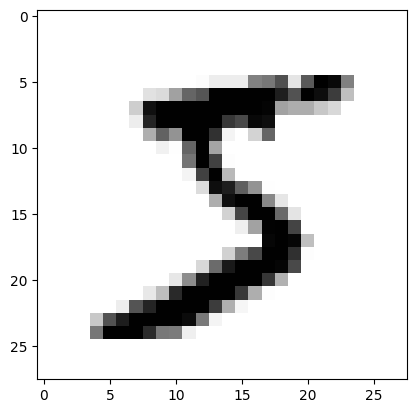

In [87]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [88]:
X_train.shape

(60000, 28, 28)

In [89]:
y_train.shape

(60000,)

In [90]:
pip install np_utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from tensorflow.keras import utils
utils.to_categorical


<function keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [92]:
num_classes=10
print('Integer-valued labels')
print(y_train[:10])

y_train=utils.to_categorical(y_train,num_classes)
y_test=utils.to_categorical(y_test,num_classes)
print("OHE")
print(y_train[:10])

Integer-valued labels
[5 0 4 1 9 2 1 3 1 4]
OHE
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [93]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

In [94]:
X_train.shape

(60000, 28, 28, 1)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [97]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='model',verbose=1,save_best_only=True)
VALIDATION_SET=(X_test,y_test)
hist=model.fit(X_train,y_train,epochs=10,validation_data=VALIDATION_SET,batch_size=64,callbacks=[checkpointer],verbose=2,
                  shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.06284, saving model to model


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


938/938 - 31s - loss: 0.5382 - accuracy: 0.9418 - val_loss: 0.0628 - val_accuracy: 0.9804 - 31s/epoch - 34ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.06284 to 0.04823, saving model to model


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


938/938 - 32s - loss: 0.0618 - accuracy: 0.9822 - val_loss: 0.0482 - val_accuracy: 0.9854 - 32s/epoch - 34ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04823 to 0.04010, saving model to model


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


938/938 - 37s - loss: 0.0441 - accuracy: 0.9875 - val_loss: 0.0401 - val_accuracy: 0.9875 - 37s/epoch - 39ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.04010
938/938 - 38s - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.0663 - val_accuracy: 0.9841 - 38s/epoch - 40ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.04010
938/938 - 31s - loss: 0.0291 - accuracy: 0.9922 - val_loss: 0.0616 - val_accuracy: 0.9863 - 31s/epoch - 33ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.04010
938/938 - 31s - loss: 0.0255 - accuracy: 0.9932 - val_loss: 0.0791 - val_accuracy: 0.9846 - 31s/epoch - 33ms/step
Epoch 7/10

Epoch 7: val_loss did not improve from 0.04010
938/938 - 31s - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.0712 - val_accuracy: 0.9889 - 31s/epoch - 33ms/step
Epoch 8/10

Epoch 8: val_loss did not improve from 0.04010
938/938 - 31s - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.0942 - val_accuracy: 0.9860 - 31s/epoch - 33ms/step
Epoch 9/10

Epoch 9: 

In [98]:
import pandas as pd

In [99]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.538175,0.941833,0.062836,0.9804
1,0.061796,0.982233,0.048227,0.9854
2,0.044131,0.987533,0.040100,0.9875
3,0.033959,0.990317,0.066255,0.9841
4,0.029054,0.992167,0.061639,0.9863
5,0.025507,0.993183,0.079078,0.9846
6,0.024166,0.994083,0.071245,0.9889
7,0.021335,0.994850,0.094210,0.9860
8,0.019861,0.995517,0.076601,0.9890
9,0.019733,0.995183,0.089170,0.9878


<Axes: >

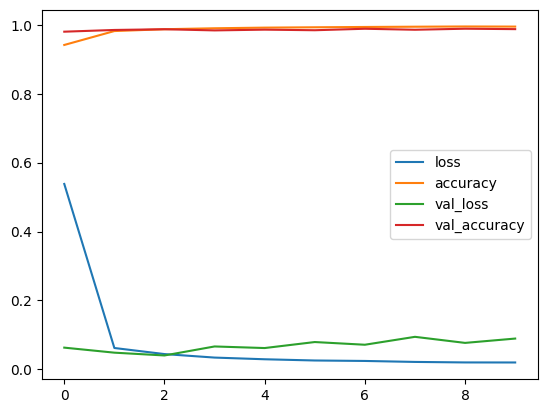

In [100]:
pd.DataFrame(hist.history).plot()

In [101]:
x_new=X_test[:1]

In [102]:
actual=y_test[:1]
actual

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [103]:
y_prob=model.predict(x_new)

1/1 [==============================] - 0s 128ms/step


In [104]:
y_pred=np.argmax(y_prob,axis=-1)

In [105]:
y_pred

array([7], dtype=int64)

In [106]:

actual
i=np.where(actual==1)

In [107]:
i[1:]

(array([7], dtype=int64),)

In [108]:
y_pred

array([7], dtype=int64)

In [109]:
import numpy as np

In [110]:
tf.keras.models.save_model(model, "num_model")

INFO:tensorflow:Assets written to: num_model\assets


INFO:tensorflow:Assets written to: num_model\assets


In [70]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
import cv2

In [112]:
img =cv2.imread('8.png')[:,:,0]

In [114]:
img=np.invert(np.array([img]))

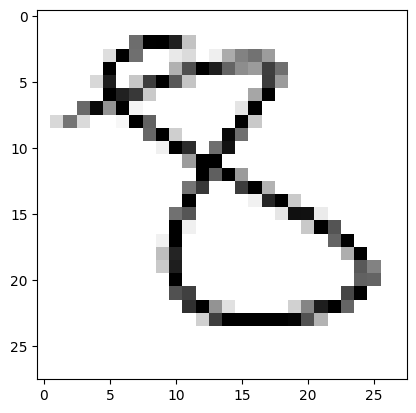

In [115]:
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()

model_clf.predict()

In [125]:
ans=np.argmax(pred)
ans

8

In [81]:
model_clf = tf.keras.models.load_model("num_model")

In [118]:
x_new.shape

(1, 28, 28, 1)

In [3]:
import pickle

In [120]:
model.predict(x_new)

1/1 [==============================] - 0s 32ms/step


array([[7.2022810e-26, 7.2006403e-24, 1.3384743e-23, 1.9233697e-24,
        2.5591784e-29, 1.0567722e-27, 5.0799872e-38, 1.0000000e+00,
        3.5625254e-30, 9.8639228e-21]], dtype=float32)

In [2]:
model_clf = tf.keras.models.load_model("num_model")



In [4]:

pickle.dump(model_clf,open('model.pkl','wb'))

In [1]:

import pickle
model_clf = pickle.load(open('models/model.pkl','rb'))

C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\el091\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ValueError: Unknown metric function: 'function'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.